In [38]:
import numpy as np
import matplotlib.pyplot as plt

# The next line indicates to matplotlib to show the plots inline in the notebook
%matplotlib inline

# Programming assignment 

You have to program a series of functions in order to generate a protein translation table. A protein is created from a sequence of nucleic acids codified in the messenger RNA (mRNA). This mRNA is read by the ribosome three bases at a time (called codons) to add one amino acid to the protein. In total there are $4^3=64$ different codons that correspond to the possible combinations of three bases.  Each codon codifies a single amino acid. The mRNA has one start codon that always codifies M and an end codon that signals the end of the protein.

The objective of this assignment is to generate this translation table. To do so you will have to:

+ Read the genome of a species from a FASTA file
+ Read the annotation file for that genome to extract the location in the genome of the Coding Sequences (CDS) for each protein
+ Extract the mRNAs from the genome that codifies each protein using its location 
+ Read the proteins from a FASTA file
+ Generate the translation table using pairs of mRNA and protein


In the following you will find the template of the functions to use and some other interesting execises 

# File parsing 

Implement the function below to parse a fasta file. Find an example of a fasta format file here:
***
<pre>>NC_000907.1:1073118-1073456 Haemophilus influenzae Rd KW20 chromoso
ATGAAAACATTATTCACTTCGGTTGTATTGTGTGGTGCGCTGGTTGTTTCTTCGTCTTTTGCTGAGGAAA
AAGCGACAGANCAAACCGCTCAATCTGTTGTGACAACTCAAGCTGAAGCTCAAGTAGCACCAGCCGTAGT
GAGCGATAAATTGAATATCAACACAGCAACTGCCAGTGAAATTCAAAAATCCTTAACTGGCATTGGTGCG
AAAAAAGCGGAAGCTATTGTGCAATATCGTGAAAAACACGGTAATTTTKCTAATGCAGAACAGCTTTTAG
AAGTACAAGGAATTGGCAAAGCAACACTAGAGAAAAATCGTGATCGTATAATCTTTTAA
</pre>
***


#### Read FASTA

In [39]:
#Función que lee un archivo fasta. Se abre el archivo y se genera un diccionario en donde la
# clave es el identificador de la secuencia y el valor es la secuencia en sí.
def readFasta(file):
    d={}
    with open(file,'r') as f:
        for line in f:
            line=line.strip()
            if ">"==line[0]: #si la línea empieza por ">", se toma el identificador.
                ident=line.split()[0][1:]
                d[ident]=''
            else: #si la línea es parte de la secuencia, forma parte del valor de dicho identificador en el diccionario, adicionándose a líneas anteriores de la secuencia si es el caso.
                d[ident]=d[ident]+line
    return d

In [40]:
# Cell for checking if readFasta is working
seqs = readFasta("phix174/phix.fa")
#print(seqs['gi|216019|gb|J02482.1|PX1CG'])
# Check that the number of sequences is one
assert(len(seqs)==1)
# Check that the length of the sequences is correct
assert(len(seqs['gi|216019|gb|J02482.1|PX1CG'])==5386)

print("All tests Ok")

All tests Ok


#### Some statistics

In [41]:
#Función que cuenta el número de veces que aparece cada base en una secuencia, 
# devolviendo una lista de bases (bases) y otra con el número de veces que aparece cada base (counts).
def countBases(sequence,bases=[]):
    counts=[] #lista con el número de ocurrencias de cada base
    if bases==[]: #si el usuario no indica las bases al llamar a la función, se cuentan las ocurrencias de todas las letras.
        bases.append('A')
        bases.append('C')
        bases.append('G')
        bases.append('T')
        for b in bases:
            counts.append(sequence.count(b))
    else: #si el usuario indica las letras que desea contar, se cuentan solamente éstas en la secuencia.
        if len(bases)==1:
            occurrences_0=sequence.count(bases[0])
            counts.append(occurrences_0)
        elif len(bases)==2:
            occurrences_0=sequence.count(bases[0])
            occurrences_1=sequence.count(bases[1])
            counts.append(occurrences_0)
            counts.append(occurrences_1)
        elif len(bases)==3:
            occurrences_0=sequence.count(bases[0])
            occurrences_1=sequence.count(bases[1])
            occurrences_2=sequence.count(bases[2])
            counts.append(occurrences_0)
            counts.append(occurrences_1)
            counts.append(occurrences_2)
        elif len(bases)==4:
            occurrences_0=sequence.count(bases[0])
            occurrences_1=sequence.count(bases[1])
            occurrences_2=sequence.count(bases[2])
            occurrences_3=sequence.count(bases[3])
            counts.append(occurrences_0)
            counts.append(occurrences_1)
            counts.append(occurrences_2)
            counts.append(occurrences_3)
    return bases,counts

Text(0, 0.5, 'Number')

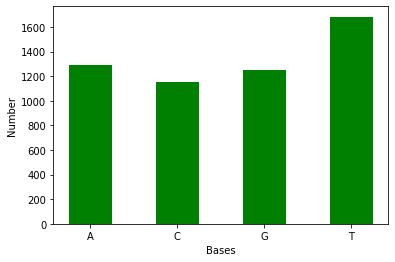

In [42]:
# Use matplotlib to show the histogram of bases for phiX174
plt.bar((countBases(seqs['gi|216019|gb|J02482.1|PX1CG'])[0]),(countBases(seqs['gi|216019|gb|J02482.1|PX1CG'])[1]),color='green',width=0.5)
plt.xlabel('Bases')
plt.ylabel('Number')

In [43]:
#Función que calcula, sobre 1, el contenido en G+C de una secuencia.
def GCContent(sequence):
    content=countBases(sequence) #conjunto de bases de la secuencia y el número de ocurrencias de cada base.
    for i in content[0]: #para cada letra de "bases"
        if i not in ['A','T','G','C']:
            print('This chain has non valid characters') #Mensaje obtenido al haber letras no válidas.
            break
        else: #si todas las letras son válidas, se calcula el GC sobre 1.
            for x in content[0]:
                if x=='G':
                    indice_G=(content[0]).index(x)
                    G_occurrences=(content[1])[indice_G] #Se determina el número de veces que aparece "G" en la secuencia 
                elif x=='C':
                    indice_C=(content[0]).index(x)
                    C_occurrences=(content[1])[indice_C] #Se determina el número de veces que aparece "C" en la secuencia
            gc=((G_occurrences+C_occurrences)/(sum(content[1]))) #Cálculo del GC sobre 1
        return gc

In [44]:
# Check that the GC content is correct
seqs = readFasta("phix174/phix.fa")
assert(GCContent(seqs['gi|216019|gb|J02482.1|PX1CG'])==0.44764203490531007)
# Check that the GC content is correct
seqs = readFasta("plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa")
assert(GCContent(seqs['NC_004325.1'])==0.20545724181242733)

print("All tests Ok")

All tests Ok


In [45]:
files = ["haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna",
         "phix174/phix.fa",
         "plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa"]
#Se han eliminado 2 de las 5 especies que el profesor indicó en el notebook ya que tardaba demasiado tiempo
# en obtenerse el resultado.

gcs = [] #lista de GC para cada especie
for file in files: #Para cada archivo de files, éste se lee y se obtiene su contenido en GC, el cual se guarda en gcs.
    seqs = readFasta(file)
    # Count only the first sequence
    keys = list(seqs.keys())
    gcs.append(GCContent(seqs[keys[0]])) 
    
print(gcs)

[0.38150285542859297, 0.44764203490531007, 0.20545724181242733]


Text(0, 0.5, 'GC content')

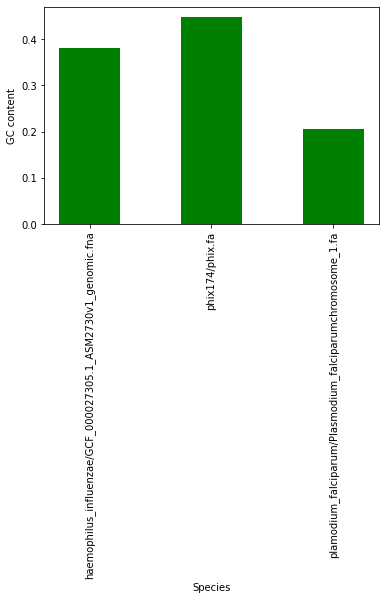

In [46]:
# Use matplotlib to show the GC content of the different species with a bar plot
plt.bar(files,gcs,color='green',width=0.5)
plt.xlabel('Species')
plt.xticks(rotation=90)
plt.ylabel('GC content')

#### Read FASTQ

In [47]:
#Función que lee un archivo fastq. Se obtienen dos listas: una relativa a las secuencias presentes en dicho archivo 
# y otra relativa a las calidades para cada una de dichas secuencias (media de calidades para todas las letras de cada secuencia)
def readFastq(file):
    sequences=[] #listas de secuencias
    qualities=[] #y calidades
    with open(file,'r') as f: #se abre el archivo fastq y se lee
        lines=f.readlines()
    for i in range(1,len(lines),4): #considerando que las secuencias aparecen cada 4 líneas, se guardan las secuencias en la lista "sequences".
        s=lines[i]
        sequences.append(s.replace("\n",""))
    for j in range(3,len(lines),4): #considerando que las calidades aparecen cada 4 líneas, se guardan las calidades en la lista "qualities"
        quality=lines[j]
        l=len(quality)
        q=0 #variable donde se irán sumando las calidades para cada posición de una determinada secuencia.
        for k in quality:
            q+=ord(k)-33 #cálculo de la calidad para cada posición de la secuencia, y esta calidad se añade a la variable q, de forma que para una secuencia habrá al final una calidad igual a la suma de calidades para cada posición.
        qualities.append(q/l) #a la lista "qualities" se añaden las medias de las calidades de cada posición de una misma secuencia.
    return sequences,qualities

CPU times: user 12.3 ms, sys: 12.3 ms, total: 24.6 ms
Wall time: 29.5 ms


5.011872336272714e-10

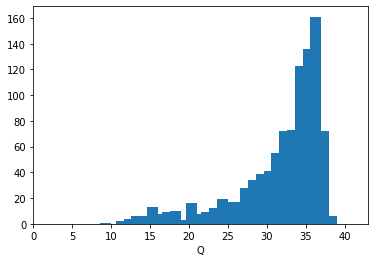

In [48]:
import math

# Use matplotlib to show the a histogram of Qs
%time rr, qq = readFastq('phix174/SRR835775_1.first1000.fastq')
#%time rr, qq = readFastq('sintetico/sample_01.fasta.fastq')

#q =np.concatenate(qq,axis=0)
plt.xlabel('Q')
plt.xlim((0,43))
hh, bb = np.histogram(qq,range(1,50))
plt.bar(np.arange(1,49),hh)
h = plt.hist(qq,range(50))

math.pow(10,-(ord('~')-33)/10)

### Spark exercise (only this cell)

In [49]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [50]:
# Implement a sequence of spark transformations to read a fasta file
# and to compute the number of occurrences of each base.

#Abrimos el documento con textFile. La secuencia está separada por saltos de línea, por lo que tenemos una lista con
#cada una de las líneas. Lo primero sería eliminar la primera línea (">") usando filter, y eso se quita con lambda distinto de >.
#Lo siguiente sería juntar las líneas usando list(x) con map. De esta forma, cada secuencia se ha transformado en una lista cuyos
#elementos son las letras de cada secuencia. Con reduce lo que hacemos es que las tuplas se fusionen,
#de manera que tenemos una lista con todas las letras de todas las secuencias, donde cada letra es un elemento de esta única lista.

fastaData=sc.textFile('phix174/phix.fa').filter(lambda x: x[0]!='>').map(lambda x: list(x)).reduce(lambda e1,e2:e1+e2)

#Al haber aplicado reduce, fastaData ya no es un RDD, por lo que se aplica parallelize para que vuelva a serlo.
#Una vez transformado, la función map asigna el valor 1 a cada letra.
#Con ReduceByKey hacemos que para cada clave igual se sumen sus valores correspondientes.

letters=sc.parallelize(fastaData).map(lambda x: (x,1)).reduceByKey(lambda e1,e2:e1+e2)
print(letters.collect())

[('C', 1157), ('G', 1254), ('A', 1291), ('T', 1684)]


# Obtaining traslation tables

In [51]:
#Función que determina la secuencia complementaria a una secuencia dada ("gen")
def complementary(gen):
    chain=''
    for b in gen:
        if b=='A':
            chain+='T'
        if b=='G':
            chain+='C'
        if b=='C':
            chain+='G'
        if b=='T' or b=='U':
            chain+='A'
    comp=chain[::-1]
    return comp

In [52]:
# Tests
assert(complementary('G')=='C')
assert(complementary('AT')=='AT')
assert(complementary('GC')=='GC')
assert(complementary('GATACA')=='TGTATC')
# If you added all possible combination of bases uncomment the 
# following line to check
# assert(complementary('GATACASWKMYRHDVBN')=='NVBHDYRKMWSTGTATC')

print('All tests OK!')

All tests OK!


In [53]:
#Función que, dados los atributos de un archivo gff, nos da el protein_id. 
def extractProteinId(attribs):
    if "protein_id=" in attribs: #Solo se devuelve el protein_id si éste está presente para cada "feature" del archivo gff.
        protein_id = attribs[attribs.find("protein_id=")+len("protein_id="):]
        i = protein_id.find(";")
        if i>=0:
            protein_id = protein_id[:i]
        return protein_id

#Función que devuelve un diccionario, en donde la clave es el protein_id y el valor es una lista consistente en
# el seqid y la información relativa a la cds (posición inicial, posición final, cadena y phase).
def extractCDSFromGFF(gff_file):
    with open(gff_file,'r') as f: #se abre el archivo indicado como "gff_file" y se lee
        lines=f.readlines()
    diccionario={} #diccionario que se mostrará al llamar a esta función.
    for l in lines: #para cada línea (cada seqid)
        if not l.startswith('#'): #si ésta no empieza por "#" (ya que algunas líneas empiezan por "#")
                lineas=l.split('\t')
                gene=lineas[0] #se establece cuál es el seqid
                atributos=lineas[8] #se establecen cuáles son los atributos
                protein=extractProteinId(atributos) #se obtiene el protein_id a partir de la función anterior.
                if protein!=None: #nos aseguramos así de que solo se tengan en cuenta aquellos seqid que tengan el campo protein_id, y por tanto que éste no sea None.
                    info_CDS=(int(lineas[3]),int(lineas[4]),lineas[6],int(lineas[7])) #se organiza la información relativa a la cds en una tupla.
                    if protein not in diccionario: #se tiene en cuenta si un protein_id aparece relacionado con uno o varios seqid.
                        diccionario[protein]=[gene,info_CDS]
                    else:
                        diccionario[protein].append(info_CDS)
    return diccionario

In [54]:
# Tests
assert(extractCDSFromGFF('haemophilus_influenzae/test1.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test2.gff')== {'NP_438174.1': ['NC_000907.1',  (2, 1021, '+', 0)],'NP_438175.1': ['NC_000907.1',  (1190, 3013, '+', 0)],'NP_438176.1': ['NC_000907.1', (3050, 3838, '-', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test3.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)],'NP_438271.2': ['NC_000907.1', (104277, 104318, '+', 0), (104318, 105274, '+',  0)]})
print('All test are OK!')

All test are OK!


In [55]:
#Función que devuelve un diccionario en donde las claves son los codones de una secuencia dada ("cds") y los valores
# son sus aminoácidos correspondientes (obtenidos a partir de "protein"), así como el codón de inicio de la secuencia.
def obtainTranslationTable(cds, protein):
    codones=[]
    aminoacidos=[]
    trans_table={}
    for x in range(3,len(cds),3): #se recorre la secuencia "cds" de 3 en 3, guardando cada codón en "codones".
        codon=cds[x:x+3]
        codones.append(codon)
    for x in range(1,len(protein)): #se recorre la secuencia proteica "protein", guardando cada aminoácido en "aminoacidos"
        aminoacidos.append(protein[x])
    start_codon=cds[0:3] #el codón de inicio son las tres primeras bases de "cds".
    for x in codones:
        if x==codones[-1]: #el valor del último codón es "*" en el diccionario.
            trans_table[x]='*'
        else: #se asigna a cada codón el aminoácido correspondiente.
            index=codones.index(x)
            trans_table[x]=aminoacidos[index]
    return trans_table, start_codon #se devuelven el diccionario y el codón de inicio.

In [56]:
translation_dictionary, start_codon = obtainTranslationTable('GTGTTTTTGGTGTGGTGA','MFLVW')
assert(translation_dictionary=={'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'})
assert(start_codon == 'GTG')

print('All test OK!')

All test OK!


In [57]:
#Función que devuelve el mRNA relativo a una secuencia, teniendo en cuenta la localización del cds en la misma.
def compose_mRNA(cromosome, cds):
    mrna = ''
    if len(cds)==1: #si el cds es continuo a lo largo de la secuencia, "cds" solo tendrá una tupla.
        if cds[0][2]=='+': #el mRNA será distinto en función de si la cadena es + o -
            mrna+=cromosome[cds[0][0]-1:cds[0][1]]
        else: #el mRNA será distinto en función de si la cadena es + o - (de ser -, se recurre a la función complementary)
            mrna+=complementary(cromosome[cds[0][0]-1:cds[0][1]])
    elif len(cds)==2: #si el cds no es continuo, "cds" tendrá dos tuplas (o más, si bien aquí solo se han considerado dos)
        if cds[0][2]=='+' or cds[1][2]=='+': #el mRNA será distinto en función de si la cadena es + o -
            mrna+=cromosome[cds[0][0]-1:cds[0][1]]+cromosome[cds[1][0]-1:cds[1][1]]
        elif cds[0][2]=='-' or cds[1][2]=='-': #el mRNA será distinto en función de si la cadena es + o - (de ser -, se recurre a la función complementary)
            mrna+=complementary(cromosome[cds[1][0]-1:cds[1][1]]+cromosome[cds[0][0]-1:cds[0][1]])
    return mrna

In [58]:
cod = 'GTGTTTTTGGTGTGGTGA'

assert(compose_mRNA(cod,[(1,len(cod),'+',0)])==cod)
assert(compose_mRNA(cod,[(1,len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(11,19,'+',0),(26,34,'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(26,34,'-',0),(11,19,'-',0)])==complementary(cod))

print("All tests are OK!")

All tests are OK!


### Cell to compute the translation tables

In [59]:
def cleanTransTable(tt):
    # Remove entries that codify 'X' (unknown)
    tt = {k:tt[k] for k in tt if tt[k]!='X'}
    # Remove entries that are not GCAT only
    tt = {k:tt[k] for k in tt if k.count('G')+k.count('C')+k.count('A')+k.count('T') == 3}
    
    return tt

# Read data
genome   = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna')
cdss     = extractCDSFromGFF('haemophilus_influenzae/test4.gff')
proteins = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_protein.faa')

# Init trans table and start codons
translation_table = {}
start_codons = set()

# Loop over all mRNA found
for protein_id in cdss:
    cds    = cdss[protein_id]
    seq_id = cds[0]
    
    mRNA   = compose_mRNA(genome[seq_id], cds[1:])
    tt, sc = obtainTranslationTable(mRNA, proteins[protein_id])
    
    translation_table.update(tt)
    start_codons.add(sc)

# Remove spurious entries from the result
translation_table = cleanTransTable(translation_table)

#Print result
print("List of start codons: ", start_codons)
print("There are {0} entries in the translation table.".format(len(translation_table)))
print("Entries:")

for i,k in enumerate(sorted(translation_table.keys())):
    if i%8==0:
        print()
    print(k + "->" + translation_table[k], end='    ')

List of start codons:  {'ATG', 'TTG'}
There are 64 entries in the translation table.
Entries:

AAA->K    AAC->N    AAG->K    AAT->N    ACA->T    ACC->T    ACG->T    ACT->T    
AGA->R    AGC->S    AGG->R    AGT->S    ATA->I    ATC->I    ATG->M    ATT->I    
CAA->Q    CAC->H    CAG->Q    CAT->H    CCA->P    CCC->P    CCG->P    CCT->P    
CGA->R    CGC->R    CGG->R    CGT->R    CTA->L    CTC->L    CTG->L    CTT->L    
GAA->E    GAC->D    GAG->E    GAT->D    GCA->A    GCC->A    GCG->A    GCT->A    
GGA->G    GGC->G    GGG->G    GGT->G    GTA->V    GTC->V    GTG->V    GTT->V    
TAA->*    TAC->Y    TAG->*    TAT->Y    TCA->S    TCC->S    TCG->S    TCT->S    
TGA->*    TGC->C    TGG->W    TGT->C    TTA->L    TTC->F    TTG->L    TTT->F    